<div style="
    background-color: #0b2343; 
    color: white; 
    padding: 25px; 
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 24px; font-weight: normal;">
        Data Analytics & Machine Learning in Finance
    </h2>
    <h1 style="margin: 5px 0 0 0; font-size: 48px; font-weight: bold;">
        Agglomerative Clustering
    </h1>
    <p style="margin: 8px 0 0 0; font-size: 18px;">
        Pedro Ramón Ventura Gómez
    </p>
    <p style="margin: 2px 0 0 0; font-size: 16px;">
        pventura@march-am.com
    </p>
</div>


# Agglomerative Clustering

**Agglomerative clustering** is a **bottom-up hierarchical clustering algorithm**. It starts by treating each observation as its own cluster and iteratively merges the two closest clusters until all points belong to a single cluster or a stopping criterion is met. The result is a **dendrogram**, a tree-like structure showing the hierarchy of clusters.

- **Unsupervised:**: no labels, only structure discovery.
- **Clustering:** Identify natural groupings in data.
- **Parametric:** Does not assume a distributional form.

**Clarification of Terms**
- **Linkage criterion:** Rule for measuring distance between clusters.
- **Dendrogram:** A tree diagram representing hierarchical relationships. You should pay attention to how the items merge into clusters and the height of the horizontal lines where the merges occur, which represent the distance between each cluster.

<div style="text-align: center">
    <img src="./images/clustering/dendogram_01.png" style="width:40%;background-color: white; padding: 10px;">
</div>

## Mathematical Formulation

The core of the algorithm relies on two key mathematical components: a **distance metric** to quantify dissimilarity between individual data points, and a **linkage criterion** to measure dissimilarity between clusters.

**1. Distance Metric**

First, we need to define the distance between two individual data points. Let $x_i$ and $x_j$ be the features vectors for data point $i$ and data point $j$. A common choice is the Euclidean distance:

$$d(x_i, x_j) = \sqrt{\sum_{t=1}^{T} (x_{i,t} - x_{j,t})^2}$$

Although there are many others depending the functional use case and your needs:

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html">scikit-learn</a> for general porpuse.
- <a href="https://riskfolio-lib.readthedocs.io/en/latest/hcportfolio.html#HCPortfolio.HCPortfolio.optimization.codependence">riskfolio-lib</a> for financial porpuse.

**2. Linkage Criterion**

Once we start merging data points into clusters, we need a rule to measure the distance between two clusters, $C_i$ and $C_j$. This rule is the **linkage criterion**. The four main types are:

  - **Single Linkage:** The distance is the minimum pairwise distance between points in the two clusters. It can find complex, non-spherical shapes but is sensitive to outliers.

    $$D(C_i, C_j) = \min_{a \in C_i, b \in C_j} d(a, b)$$

    <div style="text-align: center">
        <img src="./images/clustering/single_linkage.png" style="width:15%;background-color: white; padding: 10px;">
    </div>

  - **Complete Linkage:** The distance is the maximum pairwise distance. It tends to produce more compact, spherical clusters.

    $$D(C_i, C_j) = \max_{a \in C_i, b \in C_j} d(a, b)$$

    <div style="text-align: center">
        <img src="./images/clustering/complete_linkage.png" style="width:15%;background-color: white; padding: 10px;">
    </div>

  - **Average Linkage:** The distance is the average of all pairwise distances. It's a compromise between the two extremes above.

    $$D(C_i, C_j) = \frac{1}{|C_i||C_j|} \sum_{a \in C_i} \sum_{b \in C_j} d(a, b)$$

    where:

    - $|C_i|$ and $|C_j|$ are the number of elements in clusters $i$ and $j$ respectively.
    - $|C_i||C_j|$ is the number of pairs we can form using elements from clusters $i$ and $j$.

  - **Ward's Method:** It merges the two clusters that result in the **minimum increase in the total within-cluster variance**:
    - At each step, it looks at all possible merges between clusters.
    - It chooses the merge that causes the smallest increase in within-cluster variance (also called “error sum of squares,” ESS).

    $$
    ESS(C) = \sum_{x \in C} |x - \mu_C|^2
    $$

    $$
    \Delta(C_i, C_j) = \frac{|C_i||C_j|}{|C_i|+|C_j|} ||\mu_i - \mu_j||^2
    $$
    
    where:
      - $\mu_k$ is the centroid (mean vector) of cluster $C_k$.
      - $||\mu_i - \mu_j||^2$ is the squared Euclidean distance between centroids.
      
    Ward's method is excellent for producing tight, equally-sized clusters.

## How It Works
1. Compute distance matrix between all observations using the choosen distance metric.
  - You have $n$ points $\{x_1, x_3, x_4, \dots, x_n\}$
  - You compute the **pairwise distances** between all of them.
  - That gives you an $(n \times n)$ **distance matrix**.

2. Initialize each observation as its own cluster.

3. Repeat:
  - Find the two closest clusters based on **linkage criterion**.
    * Example: suppose $x_1$ and $x_2$ ar the closest.
  - Merge them into a new cluster.
    * $\{x_1, x_2\} \to C_{12}$
  - Update the distance matrix using the linkage formula. This means to remove the old rows/columns values correspondig to the clusters being merged, and add the new computed distances between new cluster and the rest.
    * New distance matrix $\{C_{12}, x_3, x_4, \dots, x_n\}$

4. Stop when:
   - All points are in one cluster, or
   - Desired number of clusters $k$ is reached.

5. Visualize with a **dendrogram**.

## Main Hyperparameters
- **method**: Method for computing distance between clusters (`single`, `complete`, `average`, `ward`).
- **metric**: Distance metric (`euclidean`, `manhattan`, etc.).

## Advantages
- Produces a full hierarchy (dendrogram).
- No need to pre-specify $k$ (can cut tree at any level).
- Works well for **small to medium datasets**.

## Disadvantages
- Computationally expensive for large $n$.
- Sensitive to noise and outliers.
- Sensitive to choice of linkage and distance metric.

## Playing with financial assets: Bond information

Use case and data thanks to <a href="https://www.linkedin.com/in/hrico/">Héctor Rico</a> from Banca March.

What you have here is a **universe of European government bonds** (Bunds, Spanish government debt, Italian BTPs, etc.) with their technical and market characteristics.

1. Identification and classification

* **Issuer, Ticker, ISIN, Preferred RIC**: Identify the bond across different platforms (Bloomberg, Reuters, etc.).
* **Issuer Type, Instrument Type**: Differentiate between *govies* (government) and corporates, and whether it is a bond, obligación, strip, etc.
* **Coupon Type**: Here all are “Plain Vanilla Fixed Coupon”, which simplifies calculations: fixed periodic cash flows.

2. Financial characteristics

* **Issue Date, Maturity, Mty (Years Frm Tdy)**: Issue date, maturity, and remaining time to maturity.
* **Coupon, Coupon Frequency, Next Coupon Payment Date**: Payment structure. Example: a Bund with 6.25% annual coupon, frequency 1 (annual).
* **Principal Currency**: Euros in all these cases, which removes currency risk.
* **Minimum Denomination, Min Increment**: Minimum trading sizes (e.g., 1,000 EUR).

3. Credit rating

* **Bond Grade, Mds_Rating_L, Rating_ICC**: Agency ratings (Moody’s, ICC…).

4. Market variables

* **Precios**: Clean quoted price (% of par).
* **Yield**: Yield to maturity (YTM).

### Read data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(
    "../dataset/europe_bonds_universe.csv", sep=";", parse_dates=["Issue Date", "Maturity"], dayfirst=True, decimal=","
)
data

,Issuer,Ticker,Issue Date,ISIN,Preferred RIC,Principal Currency,Country of Issue,Issuer Type,Instrument Type,Coupon Type,...,Min Increment,mes,Freq,Mty (Years Frm Tdy),Coupon,Rating_ICC,Precios,yield,UniMAz_B=500000,ingresos maximo anual
0,"Germany, Federal Republic of (Government)",BUND,2000-01-20,DE0001135143,DE113514=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,0.01,1,1,7.69,6.250,100,140.762,0.7532,703810000.0,439881.25
1,"Spain, Kingdom of (Government)",DEUDA,1998-01-14,ES0000011868,ES00001186=,Euro,Spain,Govt/Treasury/Central Bank,Obligacion del Estado,Plain Vanilla Fixed Coupon,...,1000.00,1,1,6.76,6.000,65,129.443,1.3840,647.0,38820.00
2,"Italy, Republic of (Government)",BTP,2002-03-17,IT0003256820,IT325682=,Euro,Italy,Govt/Treasury/Central Bank,Bond,Plain Vanilla Fixed Coupon,...,1000.00,1,2,10.77,5.750,55,128.439,2.6979,642.0,36915.00
3,"Germany, Federal Republic of (Government)",BUND,1998-01-22,DE0001135069,DE113506=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,0.01,1,1,5.68,5.625,100,127.384,0.6760,63692000.0,35826.75
4,"Germany, Federal Republic of (Government)",BUND,2000-10-26,DE0001135176,DE113517=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,0.01,1,1,8.69,5.500,100,138.990,0.8166,69495000.0,38222.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Electricite De France SA,ELDFR,2019-12-08,FR0013465424,FR0013465424=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,100000.00,12,1,27.63,2.000,65,78.154,4.5800,4.0,8000.00
280,BNP Paribas SA,BNPP,2020-12-02,FR0014000UL9,FR0014000UL9=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,100000.00,12,1,10.60,0.625,65,80.925,2.6900,4.0,2500.00
281,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093634884,XS2093634884=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,100000.00,12,1,17.63,0.500,100,78.995,3.7100,4.0,2000.00
282,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093705064,XS2093705064=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,100000.00,12,1,14.63,0.450,100,81.130,3.3200,4.0,1800.00


### EDA

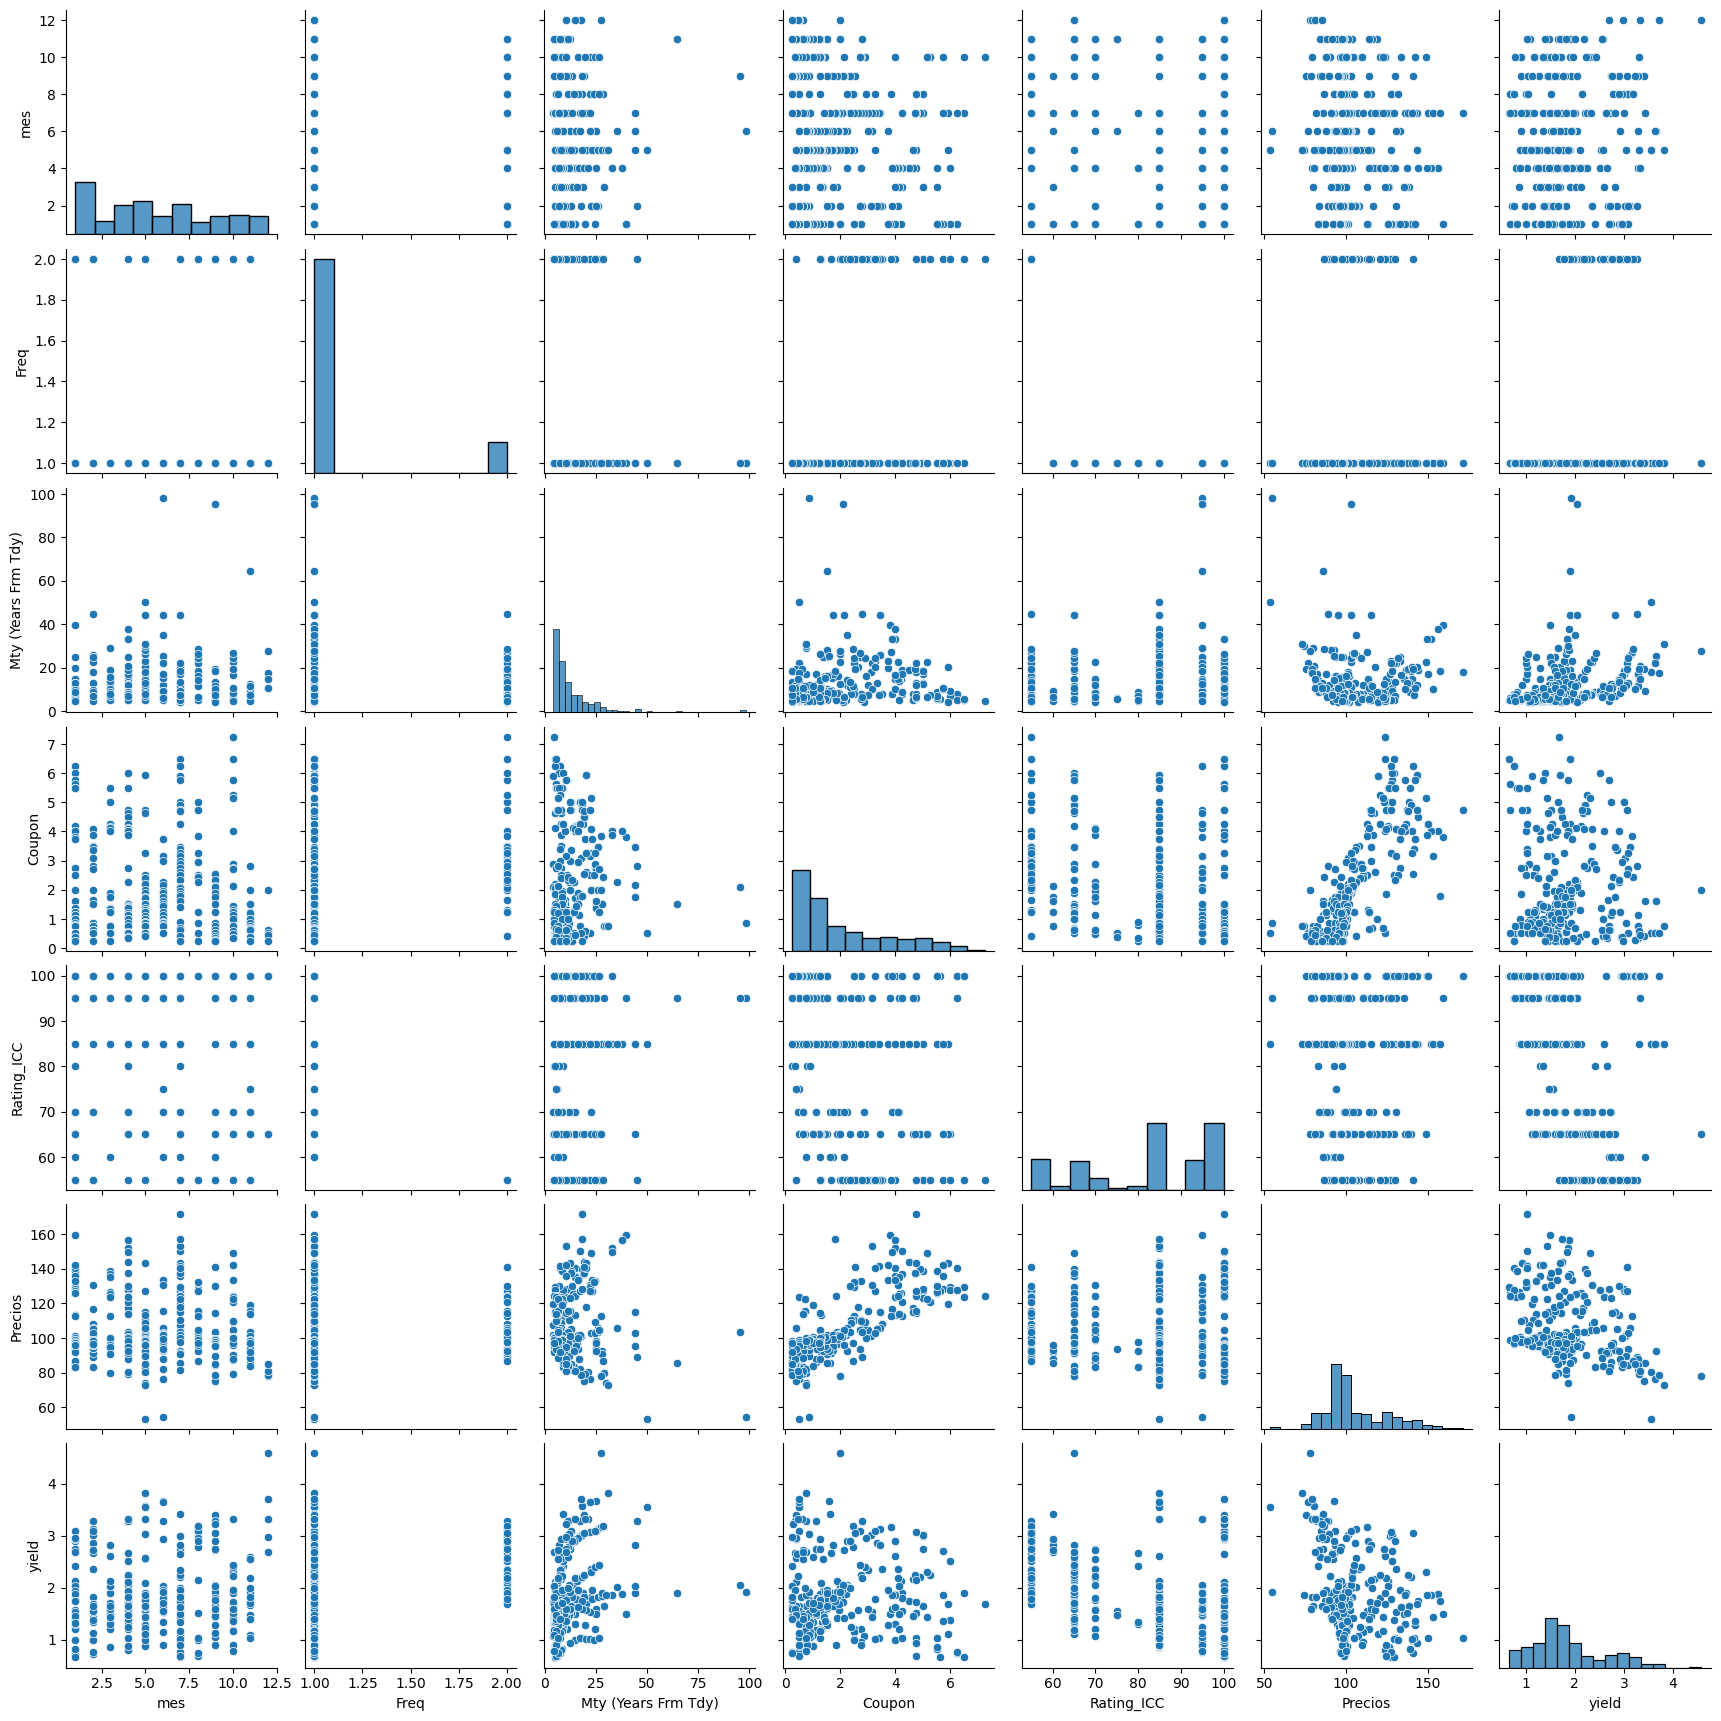

In [3]:
sns.pairplot(
    data[
        features := [
            # "Minimum Denomination",
            "mes",
            "Freq",
            "Mty (Years Frm Tdy)",
            "Coupon",
            "Rating_ICC",
            "Precios",
            "yield",
        ]
    ]
)
plt.show()

### Feature transformation

In [4]:
data[["Mty (Years Frm Tdy)_log", "Coupon_log"]] = np.log(data[["Mty (Years Frm Tdy)", "Coupon"]])

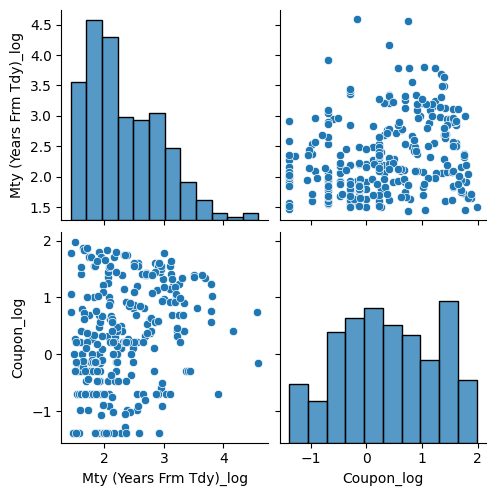

In [5]:
sns.pairplot(data[["Mty (Years Frm Tdy)_log", "Coupon_log"]])
plt.show()


Standardize data in order to avoid scale influencing the results (higher values dominating over lower values)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(
    data.loc[
        :,
        colums_to_scale := [
            "Minimum Denomination",
            "mes",
            "Freq",
            "Mty (Years Frm Tdy)_log",
            "Coupon_log",
            "Rating_ICC",
            "Precios",
            "yield",
        ],
    ]
)
data_scaled = pd.DataFrame(data_scaled, columns=colums_to_scale)
data_scaled

,Minimum Denomination,mes,Freq,Mty (Years Frm Tdy)_log,Coupon_log,Rating_ICC,Precios,yield
0,-0.790324,-1.471174,-0.381000,-0.487771,1.660779,1.073814,1.888813,-1.505001
1,-0.769511,-1.471174,-0.381000,-0.696307,1.614689,-1.124684,1.290268,-0.641050
2,-0.769511,-1.471174,2.624669,0.057186,1.566638,-1.752826,1.237176,1.158481
3,-0.790324,-1.471174,-0.381000,-0.977926,1.541822,1.073814,1.181388,-1.610735
4,-0.790324,-1.471174,-0.381000,-0.289987,1.516450,1.073814,1.795110,-1.418167
...,...,...,...,...,...,...,...,...
279,1.291011,2.039863,-0.381000,1.581409,0.374310,-1.124684,-1.421880,3.736226
280,1.291011,2.039863,-0.381000,0.031446,-0.938936,-1.124684,-1.275350,1.147662
281,1.291011,2.039863,-0.381000,0.854516,-1.190874,1.073814,-1.377408,2.544665
282,1.291011,2.039863,-0.381000,0.552745,-1.309830,1.073814,-1.264510,2.010516


### Training

Available methods and metrics in `scipy`.

In [7]:
methods = [
    "single",  # Single linkage (nearest point)
    "complete",  # Complete linkage (farthest point)
    "average",  # Average linkage (UPGMA)
    "ward",  # Ward variance minimization
    "centroid",  # Centroid linkage (UPGMC)
    "median",  # Median linkage (WPGMC)
    "weighted",  # Weighted linkage (WPGMA)
]

metrics = [
    "euclidean",  # Euclidean distance
    "minkowski",  # Minkowski distance
    "cityblock",  # City Block (Manhattan) distance
    "seuclidean",  # Standardized Euclidean distance
    "sqeuclidean",  # Squared Euclidean distance
    "cosine",  # Cosine distance
    "correlation",  # Correlation distance
    "hamming",  # Hamming distance
    "jaccard",  # Jaccard distance
    "jensenshannon",  # Jensen-Shannon distance
    "chebyshev",  # Chebyshev distance (maximum coordinate difference)
    "canberra",  # Canberra distance
    "braycurtis",  # Bray-Curtis distance
    "mahalanobis",  # Mahalanobis distance
    "yule"  # Yule distance
    "matching",  # Matching distance
    "dice",  # Dice distance
    "kulczynski1",  # kulczynski1 distance
    "rogerstanimoto",  # Rogers-Tanimoto distance
    "russellrao",  # Russell-Rao distance
    "sokalmichener",  # Sokal-Michener distance
    "sokalsneath",  # Sokal-Sneath distance
]

When we use `Ward` method and `Euclidean` distance, we are telling the algorithm: *Find me groups of bonds where the members of each group are as similar as possible to each other across all features, creating clusters that are as dense and as well-separated as possible*.

In [8]:
import scipy.cluster.hierarchy as shc

train_data = data_scaled.loc[
    :,
    cluster_features := [
        "Minimum Denomination",
        "mes",
        "Freq",
        "Mty (Years Frm Tdy)_log",
        "Coupon_log",
        "Rating_ICC",
        "Precios",
        "yield",
    ],
]
# Perform hierarchical/agglomerative clustering.
# Ref.: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
linkage_matrix = shc.linkage(train_data, method="ward", metric="euclidean")
# Form flat clusters from the hierarchical clustering defined by the given linkage matrix.
# We use here "maxclust" and "t = 3" to form 3 clusters. This way we can compare with KMeans with "k = 3".
# For all other options for parameters 'criterion' and 't', see the documentation.
# Ref.: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster
# Remember: you should perform hyperparameter tuning to find the optimal number of clusters.
clusters = shc.fcluster(Z=linkage_matrix, t=3, criterion="maxclust")
clusters

array([3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 1, 3, 3, 2, 2,
       3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       2, 3, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 3,
       1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 1,
       2, 2, 1, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2],
      dtype=int32)

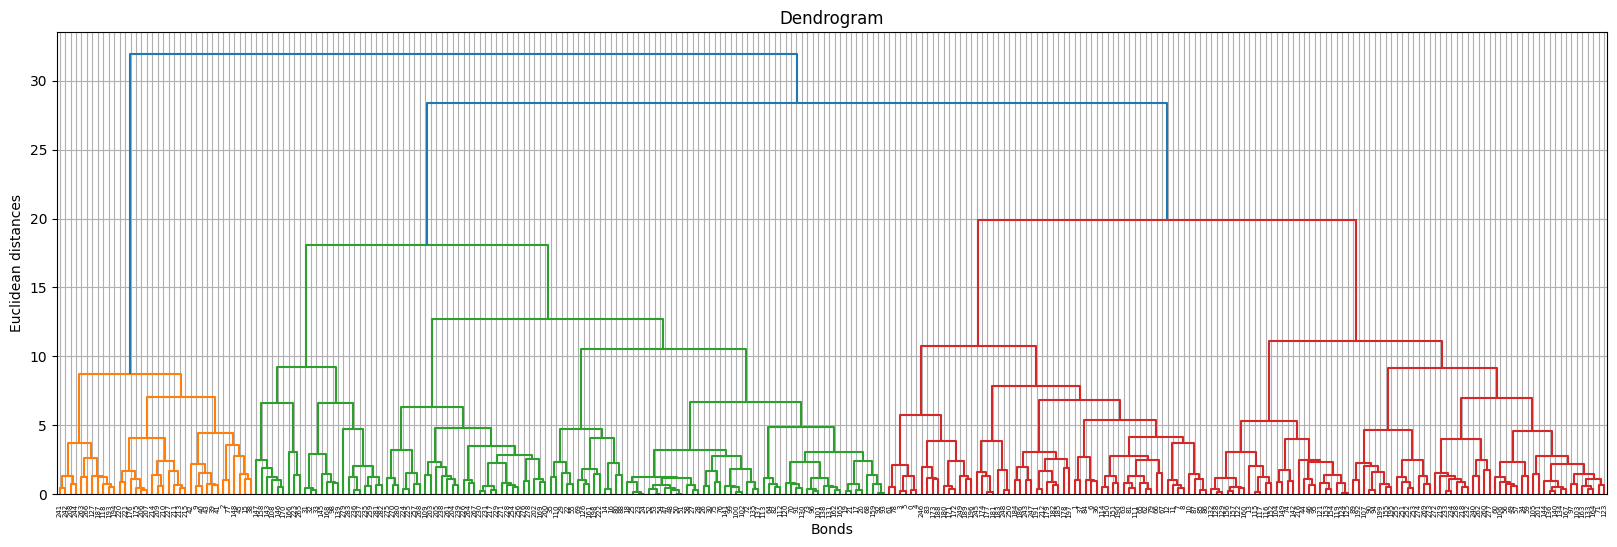

In [9]:
plt.figure(figsize=(20, 6))
shc.dendrogram(Z=linkage_matrix)
plt.title("Dendrogram")
plt.xlabel("Bonds")
plt.ylabel("Euclidean distances")
plt.grid()
plt.show()


El **Coeficiente de Correlación Cofenética (CCC)** es una puntuación de calidad del dendrograma. Mide cómo de bien las distancias de agrupación que muestra su árbol se corresponden con las distancias *reales* entre sus bonos.

**Interpretación de la Puntuación**

* **CCC cercano a 1.0** (ej. > 0.9): El dendrograma es una representación muy fiel, se puede confiar en la estructura de clústeres encontrados.
* **CCC moderado** (ej. 0.7 - 0.85): El árbol está "distorsionando" las distancias. Esto es común. La estructura general puede ser útil, pero los detalles finos (ej. por qué A está más cerca de B que de C) no.
* **CCC bajo** (ej. < 0.7): El dendrograma es una representación pobre y engañosa de sus datos.

In [10]:
# c = The cophenetic correlation distance.
# d = The cophenetic distance matrix in condensed form. The ij entry is the cophenetic distance between original observations i and j.
c, d = shc.cophenet(Z=linkage_matrix, Y=shc.distance.pdist(train_data))

print(f"Cophenetic correlation distance: {c}")

# Plot the cophenetic distance matrix.
# plt.figure(figsize=(8, 6))
# sns.heatmap(data=pd.DataFrame(shc.distance.squareform(d)), cmap="viridis")
# plt.title("Cophenetic Distance Matrix")
# plt.xlabel("Bonds")
# plt.ylabel("Bonds")
# plt.show()

Cophenetic correlation distance: 0.6781024911263441


Project to 2 dimensions to visualize data

In [11]:
from sklearn.decomposition import PCA

n = train_data.shape[1]
pca = PCA(n_components=n, random_state=42)
pca.fit(train_data)


,n_components,8
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


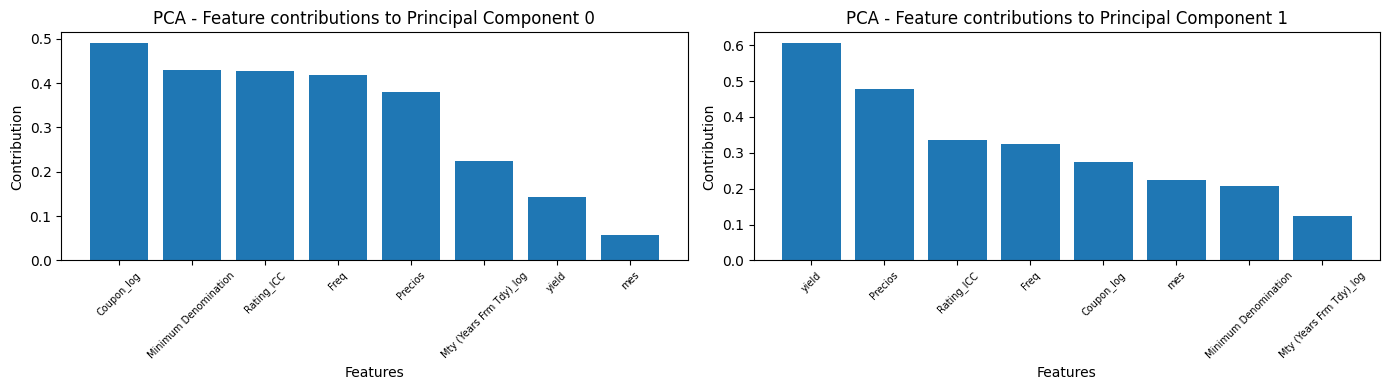

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Convert PCA components to pandas Series for sorting
pc0 = pd.Series(np.abs(pca.components_[0]), index=train_data.columns)
pc1 = pd.Series(np.abs(pca.components_[1]), index=train_data.columns)

# Plot for Principal Component 0
labels_pc0 = pc0.sort_values(ascending=False).index
values_pc0 = pc0.sort_values(ascending=False).values
axes[0].bar(labels_pc0, values_pc0)
axes[0].set_title("PCA - Feature contributions to Principal Component 0")
axes[0].set_xlabel("Features")
axes[0].set_ylabel("Contribution")
axes[0].tick_params(axis="x", rotation=45, labelsize=7)

# Plot for Principal Component 1
labels_pc1 = pc1.sort_values(ascending=False).index
values_pc1 = pc1.sort_values(ascending=False).values
axes[1].bar(labels_pc1, values_pc1)
axes[1].set_title("PCA - Feature contributions to Principal Component 1")
axes[1].set_xlabel("Features")
axes[1].set_ylabel("Contribution")
axes[1].tick_params(axis="x", rotation=45, labelsize=7)

plt.tight_layout()
plt.show()


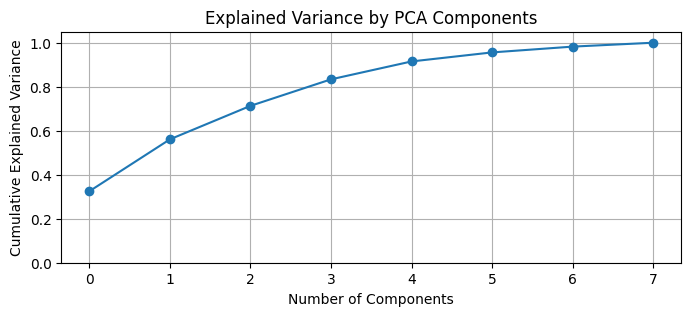

In [13]:
# Plot cummulative explained variance.
plt.figure(figsize=(8, 3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.ylim(0, 1.05)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid(True)
plt.show()


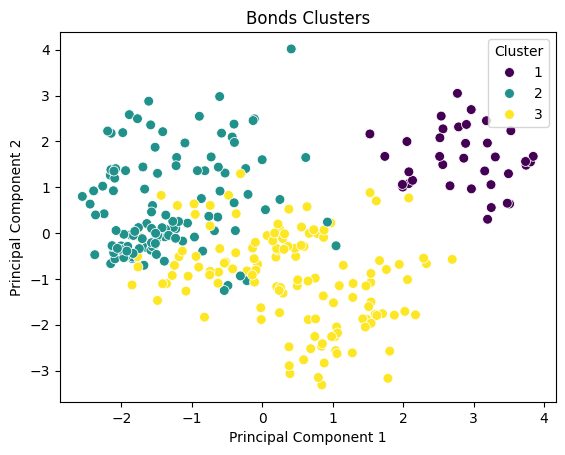

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot PCA clusters
row_coords_pca = pca.transform(train_data)[:, :2]
row_coords_pca_df = pd.DataFrame(row_coords_pca, columns=["PC1", "PC2"])
row_coords_pca_df["Cluster"] = clusters

# Create scatter plot
sns.scatterplot(data=row_coords_pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=50)
plt.title("Bonds Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


### Cluster interpretation

In [15]:
data["Cluster"] = clusters
data

,Issuer,Ticker,Issue Date,ISIN,Preferred RIC,Principal Currency,Country of Issue,Issuer Type,Instrument Type,Coupon Type,...,Mty (Years Frm Tdy),Coupon,Rating_ICC,Precios,yield,UniMAz_B=500000,ingresos maximo anual,Mty (Years Frm Tdy)_log,Coupon_log,Cluster
0,"Germany, Federal Republic of (Government)",BUND,2000-01-20,DE0001135143,DE113514=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,7.69,6.250,100,140.762,0.7532,703810000.0,439881.25,2.039921,1.832581,3
1,"Spain, Kingdom of (Government)",DEUDA,1998-01-14,ES0000011868,ES00001186=,Euro,Spain,Govt/Treasury/Central Bank,Obligacion del Estado,Plain Vanilla Fixed Coupon,...,6.76,6.000,65,129.443,1.3840,647.0,38820.00,1.911023,1.791759,3
2,"Italy, Republic of (Government)",BTP,2002-03-17,IT0003256820,IT325682=,Euro,Italy,Govt/Treasury/Central Bank,Bond,Plain Vanilla Fixed Coupon,...,10.77,5.750,55,128.439,2.6979,642.0,36915.00,2.376764,1.749200,1
3,"Germany, Federal Republic of (Government)",BUND,1998-01-22,DE0001135069,DE113506=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,5.68,5.625,100,127.384,0.6760,63692000.0,35826.75,1.736951,1.727221,3
4,"Germany, Federal Republic of (Government)",BUND,2000-10-26,DE0001135176,DE113517=,Euro,Germany,Govt/Treasury/Central Bank,Bundesanleihe,Plain Vanilla Fixed Coupon,...,8.69,5.500,100,138.990,0.8166,69495000.0,38222.25,2.162173,1.704748,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,Electricite De France SA,ELDFR,2019-12-08,FR0013465424,FR0013465424=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,27.63,2.000,65,78.154,4.5800,4.0,8000.00,3.318902,0.693147,2
280,BNP Paribas SA,BNPP,2020-12-02,FR0014000UL9,FR0014000UL9=,Euro,France,Corporate,Bond,Plain Vanilla Fixed Coupon,...,10.60,0.625,65,80.925,2.6900,4.0,2500.00,2.360854,-0.470004,2
281,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093634884,XS2093634884=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,17.63,0.500,100,78.995,3.7100,4.0,2000.00,2.869602,-0.693147,2
282,ABN Amro Bank NV,ABNAM,2019-12-11,XS2093705064,XS2093705064=,Euro,Netherlands,Corporate,Covered Bond (Other),Plain Vanilla Fixed Coupon,...,14.63,0.450,100,81.130,3.3200,4.0,1800.00,2.683074,-0.798508,2


Country of Issue

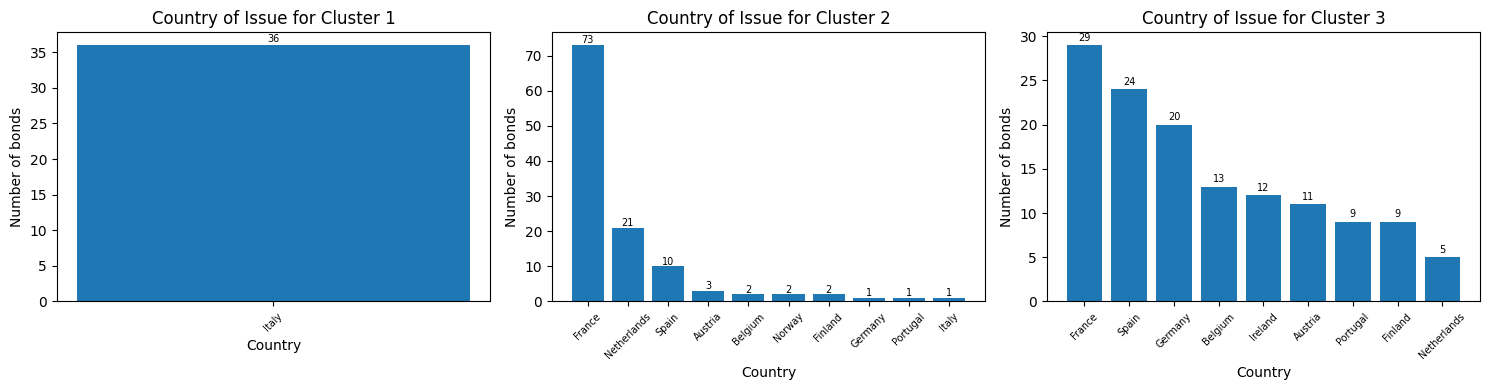

In [16]:
def plot_country_of_issue(cluster):
    mask = data["Cluster"] == cluster
    plot_data = data[mask]["Country of Issue"].value_counts()
    labels = plot_data.index
    values = plot_data.values
    plt.bar(labels, values)
    for i, v in enumerate(values):
        plt.text(i, v + 0.5, str(v), ha="center", fontsize=7)
    plt.title(f"Country of Issue for Cluster {cluster}")
    plt.xlabel("Country")
    plt.ylabel("Number of bonds")
    plt.xticks(rotation=45, fontsize=7)
    plt.tight_layout()


fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for cluster in range(1, 4):
    plt.sca(axes[cluster - 1])
    plot_country_of_issue(cluster)

plt.show()


Centroids

In [17]:
data.loc[:, features + ["Cluster"]].groupby("Cluster").mean()


,mes,Freq,Mty (Years Frm Tdy),Coupon,Rating_ICC,Precios,yield
Cluster,,,,,,,
1,6.166667,2.0,13.632500,3.340278,55.000000,110.021972,2.599372
2,5.482759,1.0,11.833621,1.103897,89.137931,92.771190,2.078957
3,5.568182,1.0,13.872273,2.531780,85.037879,114.469307,1.448838


### Clustering on PCA transformed vectorial space

Cummulative explained variance.

In [18]:
np.cumsum(pca.explained_variance_ratio_)


array([0.32519865, 0.56105343, 0.71310929, 0.83358973, 0.91491497,
       0.95597785, 0.98225794, 1.        ])

Number of components selection.

In [19]:
n = 4
transformed_train_data = pd.DataFrame(pca.transform(train_data)[:, :n], columns=[f"PC{i + 1}" for i in range(n)])


In [20]:
transformed_train_data.describe()


,PC1,PC2,PC3,PC4
count,2.840000e+02,2.840000e+02,284.000000,284.000000
mean,2.501911e-17,-5.003822e-17,0.000000,0.000000
std,1.615791e+00,1.376047e+00,1.104873,0.983488
min,-2.552580e+00,-3.313842e+00,-2.815951,-2.279500
25%,-1.415057e+00,-8.387055e-01,-0.731091,-0.672184
50%,-1.713121e-01,-1.033149e-01,-0.147785,0.066874
75%,1.049700e+00,9.612252e-01,0.744340,0.673723
max,3.845795e+00,4.018409e+00,3.237182,2.483629


Training

In [21]:
linkage_matrix_trans = shc.linkage(transformed_train_data, method="ward", metric="euclidean")
clusters_trans = shc.fcluster(Z=linkage_matrix_trans, t=3, criterion="maxclust")
clusters_trans


array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3,
       2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 1, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       3, 2, 3, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 3, 3, 3,
       1, 1, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

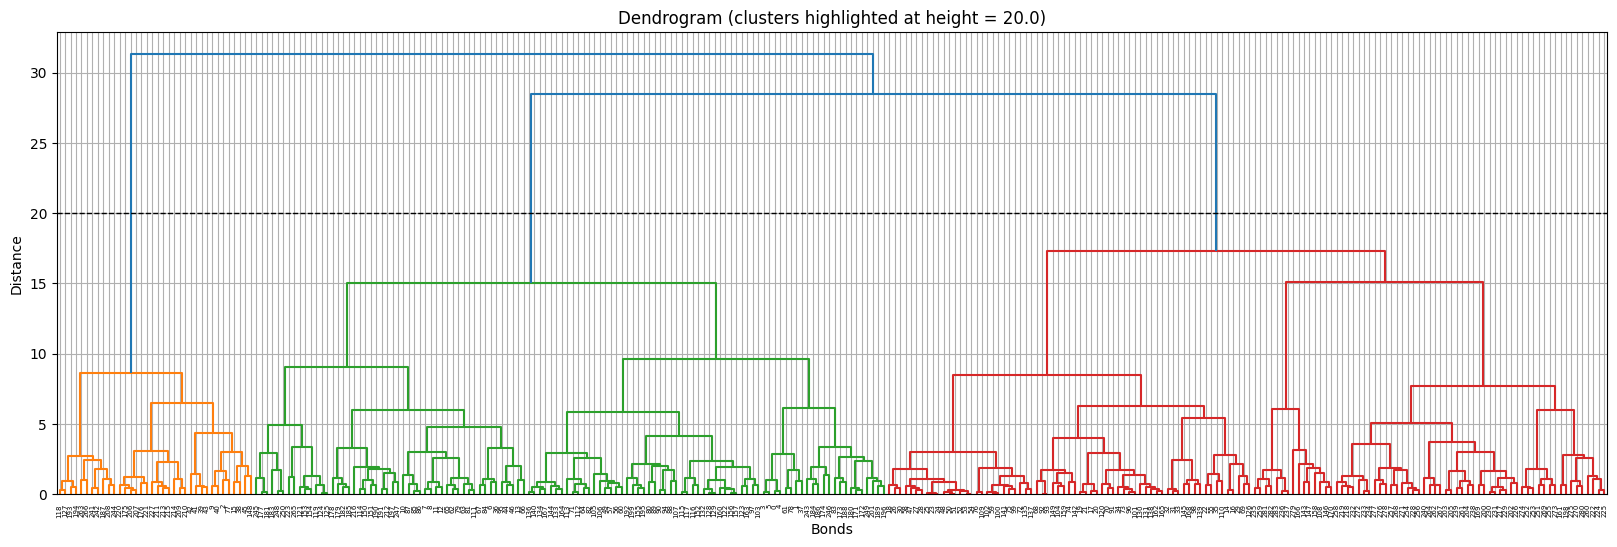

Number of clusters at that height: 3


In [22]:
# Adjust this height to the desired value.
height = 20.0

plt.figure(figsize=(20, 6))

# Color branches below the specified height
shc.dendrogram(Z=linkage_matrix_trans, color_threshold=height)

# Horizontal line marking the cut height.
plt.axhline(y=height, color="black", linestyle="--", linewidth=1)

# Plot settings.
plt.title(f"Dendrogram (clusters highlighted at height = {height})")
plt.xlabel("Bonds")
plt.ylabel("Distance")
plt.grid()
plt.show()

# Get cluster assignment by distance and show count
clusters_at_height = shc.fcluster(linkage_matrix_trans, t=height, criterion="distance")
print("Number of clusters at that height:", len(np.unique(clusters_at_height)))


In [23]:
# c = The cophenetic correlation distance.
# d = The cophenetic distance matrix in condensed form. The ij entry is the cophenetic distance between original observations i and j.
c, d = shc.cophenet(Z=linkage_matrix_trans, Y=shc.distance.pdist(transformed_train_data))

print(f"Cophenetic correlation distance: {c}")


Cophenetic correlation distance: 0.6462405747607862


Project to 2 dimensions to visualize data

In [24]:
n = transformed_train_data.shape[1]
pca_trans = PCA(n_components=n, random_state=42)
pca_trans.fit(transformed_train_data)


,n_components,4
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,42


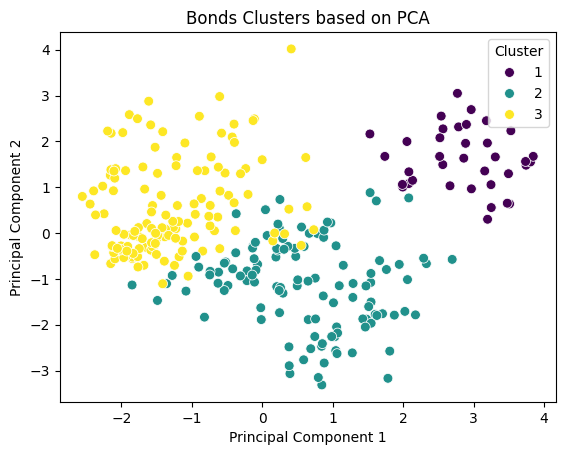

In [25]:
# Plot PCA clusters
row_coords_pca_trans = pca_trans.transform(transformed_train_data)[:, :2]
row_coords_pca_df = pd.DataFrame(row_coords_pca_trans, columns=["PC1", "PC2"])
row_coords_pca_df["Cluster_Transformed"] = clusters_trans

# Create scatter plot
sns.scatterplot(data=row_coords_pca_df, x="PC1", y="PC2", hue="Cluster_Transformed", palette="viridis", s=50)
plt.title("Bonds Clusters based on PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


### And now what?

Let's tune the hyperparameters (methods and metrics) and see how the cophenetic correlation coefficient (CCC) varies.

In [26]:
import scipy.cluster.hierarchy as shc
import pandas as pd
from scipy.spatial.distance import pdist
import warnings

# List to store results.
results = []

# Suppress warnings that may arise with some distance metrics.
warnings.filterwarnings("ignore")

print(f"Starting sweep of {len(methods)} methods and {len(metrics)} metrics...")

# --- 2. Iteration Loop and Calculation ---

for met in methods:
    for mtr in metrics:
        # --- Handling Restrictions ---
        # The 'ward' method is mathematically defined ONLY for 'euclidean'.
        # Skip any other combination for 'ward'.
        if met == "ward" and mtr != "euclidean":
            continue

        try:
            # --- Step A: Calculate the original distance matrix ---
            # This step will fail if a metric is not compatible with the data.
            original_distances = pdist(train_data, metric=mtr)

            # --- Step B: Calculate the linkage matrix (clustering) ---
            # 'ward' is special: it requires the original data (train_data).
            # All other methods can use the pre-calculated distance matrix.
            if met == "ward":
                linkage_matrix = shc.linkage(train_data, method="ward", metric="euclidean")
            else:
                # Using the pre-calculated distance is more efficient
                linkage_matrix = shc.linkage(original_distances, method=met)

            # --- Step C: Calculate the Cophenetic Coefficient ---
            # Compare the tree (linkage_matrix) vs. the "truth" (original_distances)
            c, d = shc.cophenet(linkage_matrix, original_distances)

            # Save the successful result
            results.append({"Method": met, "Metric": mtr, "CCC": c})

        except Exception as e:
            # Some combinations will fail (e.g., binary metrics on continuous data)
            # Record them as 'None' to know they were attempted.
            # print(f"Error in ({met}, {mtr}): {e}") # Uncomment to debug
            results.append({"Method": met, "Metric": mtr, "CCC": None})

print("Sweep completed.")

# --- 3. Processing Results ---

# Convert the results list into a DataFrame
df_results = pd.DataFrame(results)

# Remove combinations that failed (CCC = None)
df_results = df_results.dropna(subset=["CCC"])

# Sort the DataFrame by CCC in descending order
df_results_sorted = df_results.sort_values(by="CCC", ascending=False)

# --- 4. Show Results ---

df_results_sorted


Starting sweep of 7 methods and 21 metrics...
Sweep completed.


,Method,Metric,CCC
49,average,hamming,0.861952
113,weighted,hamming,0.816731
45,average,seuclidean,0.777127
42,average,euclidean,0.777127
43,average,minkowski,0.777127
...,...,...,...
98,median,mahalanobis,0.533588
10,single,chebyshev,0.529081
31,complete,chebyshev,0.493011
12,single,braycurtis,0.490126


Execute clustering with the best hyperparameters found.

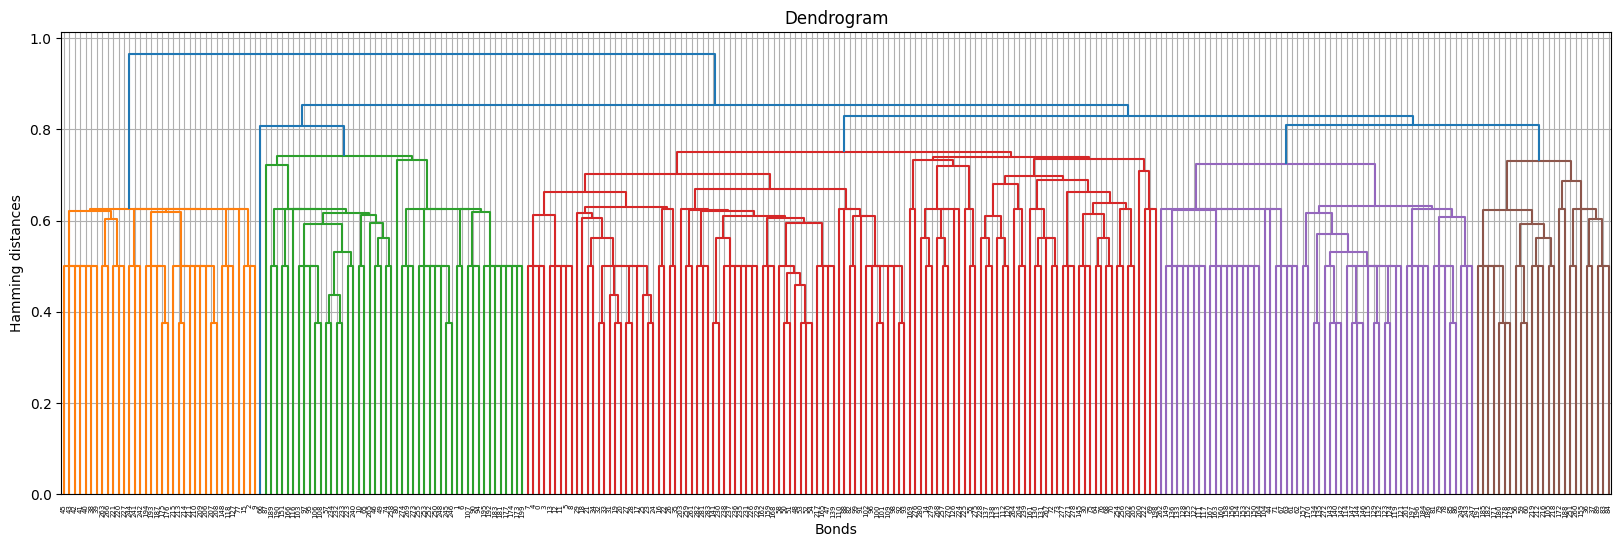

In [27]:
linkage_matrix = shc.linkage(train_data, method="average", metric="hamming")
clusters = shc.fcluster(Z=linkage_matrix, t=6, criterion="maxclust")

# Adjust this height to the desired value.
height = 0.8

plt.figure(figsize=(20, 6))
shc.dendrogram(Z=linkage_matrix, color_threshold=height)
plt.title("Dendrogram")
plt.xlabel("Bonds")
plt.ylabel("Hamming distances")
plt.grid()
plt.show()

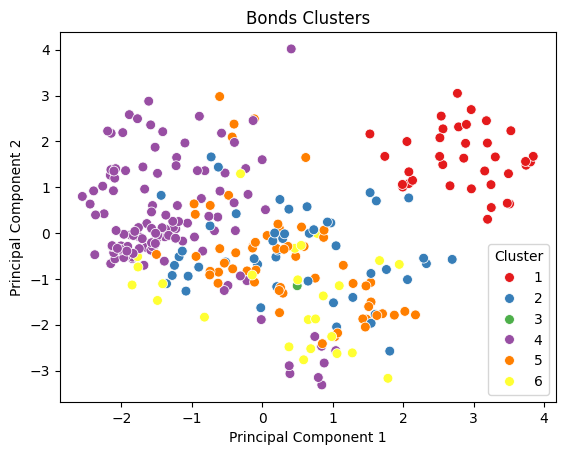

In [28]:
# Plot PCA clusters
row_coords_pca = pca.transform(train_data)[:, :2]
row_coords_pca_df = pd.DataFrame(row_coords_pca, columns=["PC1", "PC2"])
row_coords_pca_df["Cluster"] = clusters

# Create scatter plot
sns.scatterplot(data=row_coords_pca_df, x="PC1", y="PC2", hue="Cluster", palette="Set1", s=50)
plt.title("Bonds Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [29]:
data["Cluster"] = clusters
data.loc[:, features + ["Cluster"]].groupby("Cluster").mean()

,mes,Freq,Mty (Years Frm Tdy),Coupon,Rating_ICC,Precios,yield
Cluster,,,,,,,
1,6.166667,2.0,13.632500,3.340278,55.000000,110.021972,2.599372
2,6.479167,1.0,18.368958,2.256771,80.104167,108.686052,1.642938
3,3.000000,1.0,13.910000,4.125000,95.000000,125.450000,2.034000
4,5.094828,1.0,9.142328,1.327603,90.258621,96.776716,1.923174
5,5.500000,1.0,16.634310,2.188276,85.000000,109.361741,1.693198
6,5.880000,1.0,11.316800,2.755000,89.000000,118.397840,1.208676


**Homework**

* Plot the Spot Curve as of April 2022 along with the bonds colored by cluster.